<a href="https://colab.research.google.com/github/ronyavivi/YouTube_Videos_and_Channels_Metadata/blob/main/YouTube_Videos_and_Channels_Metadata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YouTube Videos and Channels Metadata
Rony Avivi

Importing libraries:

In [458]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os

import re

In [459]:
from google.colab import files

files.upload()

{}

Mount to google drive:

In [460]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading the data:

In [461]:
data = pd.read_csv('/content/YouTubeDataset_withChannelElapsed.csv', index_col=0)

##Data Exploration and Preprocessing:
In this notebook I will explore what characteristic of Youtube videos and channels are related to videos’ popularity using the YouTube Videos and Channels Metadata dataset. 

In [462]:
data.head()

,totalviews/channelelapsedtime,channelId,videoCategoryId,channelViewCount,likes/subscriber,views/subscribers,videoCount,subscriberCount,videoId,dislikes/views,...,comments/views,totvideos/videocount,elapsedtime,videoLikeCount,videoDislikeCount,dislikes/subscriber,totviews/totsubs,views/elapsedtime,videoPublished,VideoCommentCount
index,,,,,,,,,,,,,,,,,,,,,
0,0.165199,UCdzU3DSGzyWzN2118yd9X9g,22,14654,0.555556,95.111111,30,18,--DwgB78t-c,0.000584,...,0.000000,488.466667,50040,10,1,0.055556,814.111111,0.034213,2012-01-19T18:38:28.000Z,0
1,1.133820,UC0UnhAG47DRyVZGVcbhAXhQ,10,105909,0.239130,59.326087,51,184,--NZRkXBV7k,0.000275,...,0.000183,2076.647059,22080,44,3,0.016304,575.592391,0.494384,2015-03-30T04:04:40.000Z,2
2,0.668120,UCXjtAvK5P3wXBGh0vbGylzg,27,48265,0.023669,10.289941,72,338,--hoQ2sGG4M,0.000288,...,0.000575,670.347222,71544,8,1,0.002959,142.795858,0.048613,2009-08-07T06:51:10.000Z,2
3,25.653505,UCeKHMeUlcLNPLCLUfZUQI2w,26,2116722,0.007301,0.884178,172,22051,--sBoaqBlzA,0.000308,...,0.000513,12306.523256,54096,161,6,0.000272,95.992109,0.360415,2011-08-04T01:07:38.000Z,10
4,52.773778,UCNWPDyaWf2eAHnofFLSnEMg,20,1649075,0.004545,10.004545,2777,220,--7h1S4neDM,0.000000,...,0.000000,593.833273,30120,1,0,0.000000,7495.795455,0.073074,2014-04-29T15:44:44.000Z,0


Dropping duplicates:

In [463]:
df = data.drop_duplicates()

In [464]:
df.keys()

Index(['totalviews/channelelapsedtime', 'channelId', 'videoCategoryId',
       'channelViewCount', 'likes/subscriber', 'views/subscribers',
       'videoCount', 'subscriberCount', 'videoId', 'dislikes/views',
       'channelelapsedtime', 'comments/subscriber', 'likes/views',
       'channelCommentCount', 'videoViewCount', 'likes/dislikes',
       'comments/views', 'totvideos/videocount', 'elapsedtime',
       'videoLikeCount', 'videoDislikeCount', 'dislikes/subscriber',
       'totviews/totsubs', 'views/elapsedtime', 'videoPublished',
       'VideoCommentCount'],
      dtype='object')

In [465]:
print(df.shape)

(556424, 26)


####Explaining the features:
NB: `elapsed time` - average time spent watching a video per user.:

|Column name|Description|
|:----|:----|
|totalviews/channelelapsedtime|Ratio of total views to channel elapsed time. (Ratio)|
|channelViewCount|Total number of views for the channel. (Integer)|
|likes/subscriber|Ratio of likes to subscribers. (Ratio)|
|views/subscribers|Ratio of views to subscribers. (Ratio)|
|subscriberCount|Total number of subscribers for the channel. (Integer)|
|dislikes/views|Ratio of dislikes to views. (Ratio)|
|comments/subscriber|Ratio of comments to subscribers. (Ratio)|
|channelCommentCount|Total number of comments for the channel. (Integer)|
|likes/dislikes|Ratio of likes to dislikes. (Ratio)|
|comments/views|Ratio of comments to views. (Ratio)|
|dislikes/subscriber|Ratio of dislikes to subscribers. (Ratio)|
|totviews/totsubs|Ratio of total views to total subscribers. (Ratio)|
|views/elapsedtime|Ratio of views to elapsed time. (Ratio)|

What we want to know about the data currently :
- how many null values in each feature.
- how many different values each feature gets.
- what is the type of each feature.

In [466]:
def Describe_data (data) : 
    columns_lst = ['Feature Name', 'Null', 'Type','Unique Values']
    final = pd.DataFrame (columns = columns_lst)
    for column in data.columns[:] : 
        cur_row =[column, data[column].isna().sum(), data[column].dtypes ,data[column].nunique()]
        final.loc[final.shape[0]] = cur_row
    return (final)

Describe_data(df)

,Feature Name,Null,Type,Unique Values
0,totalviews/channelelapsedtime,0,float64,493668
1,channelId,0,object,449980
2,videoCategoryId,0,int64,18
3,channelViewCount,0,int64,365692
4,likes/subscriber,0,float64,224777
5,views/subscribers,0,float64,466799
6,videoCount,0,int64,9765
7,subscriberCount,0,int64,84247
8,videoId,0,object,555627
9,dislikes/views,0,float64,165636


We can see that the data almost does'nt contain any null values and have mostly numeric data.

The 'videoPublished' column is 'object', which means pandas currently views these values as strings. I will convert the 'videoPublished' column to 'datetime' type so I could analyze and engineer it properly and conveniently.

In [467]:
import datetime
df.loc[:, 'videoPublished'] = pd.to_datetime(df['videoPublished'])

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Let's cast the ids of video categories as strings they practically are:

In [468]:
df['videoCategoryId'] = df['videoCategoryId'].astype('str')

<ipython-input-468-5fb472045f56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['videoCategoryId'] = df['videoCategoryId'].astype('str')


Checking that it worked:

In [469]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 556424 entries, 0 to 575609
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype              
---  ------                         --------------   -----              
 0   totalviews/channelelapsedtime  556424 non-null  float64            
 1   channelId                      556424 non-null  object             
 2   videoCategoryId                556424 non-null  object             
 3   channelViewCount               556424 non-null  int64              
 4   likes/subscriber               556424 non-null  float64            
 5   views/subscribers              556424 non-null  float64            
 6   videoCount                     556424 non-null  int64              
 7   subscriberCount                556424 non-null  int64              
 8   videoId                        556424 non-null  object             
 9   dislikes/views                 556424 non-null  float64            
 10  channele

In [470]:
descriptive = df.describe().T
descriptive 

,count,mean,std,min,25%,50%,75%,max
totalviews/channelelapsedtime,556424.0,7.303149e+02,6.584883e+03,0.000000,0.776659,6.244611,5.714706e+01,6.835327e+05
channelViewCount,556424.0,4.944669e+07,4.705131e+08,0.000000,50621.750000,410809.500000,3.646837e+06,2.379817e+10
likes/subscriber,556424.0,5.610958e-01,2.814415e+00,-1.000000,0.002811,0.029289,2.727273e-01,5.050000e+02
views/subscribers,556424.0,3.087293e+02,1.587791e+03,-1.000000,0.907568,11.696803,1.202383e+02,2.798030e+05
videoCount,556424.0,1.219860e+03,8.388582e+03,0.000000,17.000000,70.000000,3.380000e+02,4.155000e+05
subscriberCount,556424.0,8.277496e+04,6.124310e+05,0.000000,38.000000,411.000000,5.388000e+03,2.525311e+07
dislikes/views,556424.0,-1.937380e-02,1.398066e-01,-1.000000,0.000000,0.000176,5.543237e-04,3.229814e-01
channelelapsedtime,556424.0,6.794383e+04,2.063212e+04,888.000000,51960.000000,68400.000000,8.582400e+04,1.089130e+05
comments/subscriber,556424.0,1.397337e-01,1.498607e+00,-1.000000,0.000000,0.002469,4.545455e-02,4.850000e+02
likes/views,556424.0,-1.367660e-02,1.411534e-01,-1.000000,0.001304,0.002935,6.365437e-03,1.418500e+00


For some reasons, some ratio columns ('likes/subscriber' etc.) have negative values in it, we need to handle this.

### Dealing with Negative Values:
It is impossible for a ratio to be negative.

A number of something can't be less than zero as well.

We can asume that some negative value can stand for the gap in the original data being, in fact, a placeholder.<br>However, in this case, we should see some pattern and uniformity of usage. For instance, only `-1` shall be used.

In other cases, we need to do something about it.
<br><br>
Let us explore the columns 'below zero'.<br>After this, we will wipe all the negative values away.<br>It will be quite easy to fill the null values once again or drop them completely, if needed.

In [471]:
# Calculating share of null values for the column.
def print_null_share(column):
    null_sum = data[column].isna().sum()
    null_to_len = null_sum / len(data[column])
    print(f"'{column}', percentage of null-values: {null_to_len:.2%}.")

In [472]:
# Let's keep columns with negative values in a list.
columns_below_zero = []

# We will go through the columns with numeric values of our dataset.
for column_name in df.select_dtypes(include='number').columns.to_list():
    if df[column_name].min() < 0:
        columns_below_zero.append(f'{column_name}')
        print(f"'{column_name}'")
        
        # We will print unique negative values.
        # At the same time, we need to set a limit to keep it quick.
        print("Unique values 'below zero':")
        i = 0
        for elem in df.loc[df[column_name] < 0][column_name].unique():
            print(f'{elem}')
            i += 1
            # If more than 5 values is already printed, it stops.
            if i > 4:
                print('- and others.')
                break
                
        print(f"Minimum value: {df[column_name].min()}")
        
        # Now, we will wipe the negative values away.
        print_null_share(column_name)
        print('--> Now, we are erasing negative values.')
        df.loc[df[column_name] < 0, column_name] = np.nan
        print_null_share(column_name)
        print()

'likes/subscriber'
Unique values 'below zero':
-1.0
Minimum value: -1.0
'likes/subscriber', percentage of null-values: 0.00%.
--> Now, we are erasing negative values.
'likes/subscriber', percentage of null-values: 0.00%.

'views/subscribers'
Unique values 'below zero':
-1.0
Minimum value: -1.0
'views/subscribers', percentage of null-values: 0.00%.
--> Now, we are erasing negative values.
'views/subscribers', percentage of null-values: 0.00%.

'dislikes/views'
Unique values 'below zero':
-1.0
Minimum value: -1.0
'dislikes/views', percentage of null-values: 0.00%.
--> Now, we are erasing negative values.
'dislikes/views', percentage of null-values: 0.00%.

'comments/subscriber'
Unique values 'below zero':
-1.0
Minimum value: -1.0
'comments/subscriber', percentage of null-values: 0.00%.
--> Now, we are erasing negative values.
'comments/subscriber', percentage of null-values: 0.00%.

'likes/views'
Unique values 'below zero':
-1.0
Minimum value: -1.0
'likes/views', percentage of null-value

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


'likes/views', percentage of null-values: 0.00%.

'videoViewCount'
Unique values 'below zero':
-1
Minimum value: -1
'videoViewCount', percentage of null-values: 0.00%.
--> Now, we are erasing negative values.
'videoViewCount', percentage of null-values: 0.00%.

'likes/dislikes'
Unique values 'below zero':
-2.0
-1.0
Minimum value: -2.0
'likes/dislikes', percentage of null-values: 0.00%.
--> Now, we are erasing negative values.
'likes/dislikes', percentage of null-values: 0.00%.

'comments/views'
Unique values 'below zero':
-1.0
Minimum value: -1.0
'comments/views', percentage of null-values: 0.00%.
--> Now, we are erasing negative values.
'comments/views', percentage of null-values: 0.00%.

'totvideos/videocount'
Unique values 'below zero':
-1.0
Minimum value: -1.0
'totvideos/videocount', percentage of null-values: 0.00%.
--> Now, we are erasing negative values.
'totvideos/videocount', percentage of null-values: 0.00%.

'videoLikeCount'
Unique values 'below zero':
-1
Minimum value: -1
'

Having in mind the uniformity of usage of `-1` in several columns, we could have thought about being a substitute for null-values.

However, in other columns the situation is more nuanced, and there is a bigger variety of possible negative values that can't be explained by conventions and/or some natural causes.

**We will fill the gaps with median for this or that video category**<br>
In most cases, most of the values are positive: negative values are making up way less than 5-6% of this or that particular column. Whatever we do, hopefully, we will not affect the majority of rows and overall pattern.<br>To make the values less artificial and not to erase rows, we will fill the null-values with median value calculated for each video category.


In [473]:
# Filling the gaps.
for column_name in columns_below_zero:
    df[column_name] = df[column_name].fillna(df
                                               .groupby('videoCategoryId')
                                               [column_name].transform("median"))

<ipython-input-473-782f3160816f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].fillna(df


In [474]:
descriptive = df.describe().T
descriptive

,count,mean,std,min,25%,50%,75%,max
totalviews/channelelapsedtime,556424.0,7.303149e+02,6.584883e+03,0.000000,0.776659,6.244611,5.714706e+01,6.835327e+05
channelViewCount,556424.0,4.944669e+07,4.705131e+08,0.000000,50621.750000,410809.500000,3.646837e+06,2.379817e+10
likes/subscriber,556424.0,6.127267e-01,2.794877e+00,0.000000,0.004666,0.034993,2.727273e-01,5.050000e+02
views/subscribers,556424.0,3.094074e+02,1.587666e+03,0.000054,1.299346,14.101171,1.202383e+02,2.798030e+05
videoCount,556424.0,1.219860e+03,8.388582e+03,0.000000,17.000000,70.000000,3.380000e+02,4.155000e+05
subscriberCount,556424.0,8.277496e+04,6.124310e+05,0.000000,38.000000,411.000000,5.388000e+03,2.525311e+07
dislikes/views,556424.0,5.485303e-04,1.619570e-03,0.000000,0.000000,0.000186,5.543237e-04,3.229814e-01
channelelapsedtime,556424.0,6.794383e+04,2.063212e+04,888.000000,51960.000000,68400.000000,8.582400e+04,1.089130e+05
comments/subscriber,556424.0,1.904480e-01,1.475999e+00,0.000000,0.000080,0.003277,4.545455e-02,4.850000e+02
likes/views,556424.0,6.303361e-03,1.239017e-02,0.000000,0.001408,0.003005,6.365437e-03,1.418500e+00


In [475]:
descriptive.to_csv(os.path.join(os.getcwd(), 'feature_description.csv'))

To make our futher visualisations more clear, let us decipher video categories. <br>we will decipher them by borrowing their meaning from [here](https://gist.github.com/dgp/1b24bf2961521bd75d6c))

In [476]:
df['videoCategory'] = np.nan

for item in [['2', 'Autos & Vehicles'], ['1', 'Film & Animation'],
             ['10', 'Music'], ['15', 'Pets & Animals'],
             ['17', 'Sports'], ['18', 'Short Movies'],
             ['19', 'Travel & Events'], ['20', 'Gaming'],
             ['21', 'Videoblogging'], ['22', 'People & Blogs'],
             ['23', 'Comedy'], ['24', 'Entertainment'],
             ['25', 'News & Politics'], ['26', 'Howto & Style'],
             ['27', 'Education'], ['28', 'Science & Technology'],
             ['29', 'Nonprofits & Activism'], ['30', 'Movies'],
             ['31', 'Anime/Animation'], ['32', 'Action/Adventure'],
             ['33', 'Classics'], ['34', 'Comedy'], ['35', 'Documentary'],
             ['36', 'Drama'], ['37', 'Family'], ['38', 'Foreign'],
             ['39', 'Horror'], ['40', 'Sci-Fi/Fantasy'], ['41', 'Thriller'],
             ['42', 'Shorts'], ['43', 'Shows'], ['44', 'Trailers']]:
    
    (df
     .loc[df['videoCategoryId'] == item[0],
          'videoCategory']) = item[1]

<ipython-input-476-0a21491481a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['videoCategory'] = np.nan
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [477]:
df.head(3)

,totalviews/channelelapsedtime,channelId,videoCategoryId,channelViewCount,likes/subscriber,views/subscribers,videoCount,subscriberCount,videoId,dislikes/views,...,totvideos/videocount,elapsedtime,videoLikeCount,videoDislikeCount,dislikes/subscriber,totviews/totsubs,views/elapsedtime,videoPublished,VideoCommentCount,videoCategory
index,,,,,,,,,,,,,,,,,,,,,
0,0.165199,UCdzU3DSGzyWzN2118yd9X9g,22,14654,0.555556,95.111111,30,18,--DwgB78t-c,0.000584,...,488.466667,50040,10.0,1.0,0.055556,814.111111,0.034213,2012-01-19 18:38:28+00:00,0.0,People & Blogs
1,1.133820,UC0UnhAG47DRyVZGVcbhAXhQ,10,105909,0.239130,59.326087,51,184,--NZRkXBV7k,0.000275,...,2076.647059,22080,44.0,3.0,0.016304,575.592391,0.494384,2015-03-30 04:04:40+00:00,2.0,Music
2,0.668120,UCXjtAvK5P3wXBGh0vbGylzg,27,48265,0.023669,10.289941,72,338,--hoQ2sGG4M,0.000288,...,670.347222,71544,8.0,1.0,0.002959,142.795858,0.048613,2009-08-07 06:51:10+00:00,2.0,Education


Let's chack the density of 'elapsedtime' and 'channelelapsedtime':

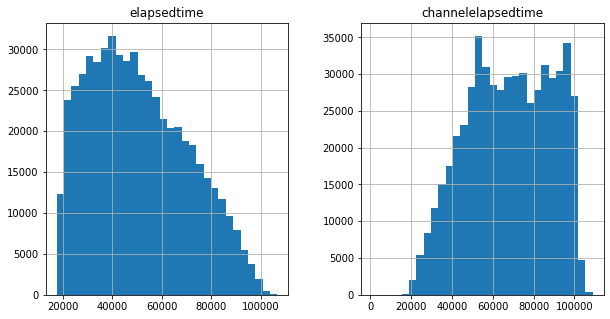

In [478]:
# Select the elapsedtime and channelelapsedtime columns
cols = ['elapsedtime', 'channelelapsedtime']

# Create histograms for the selected columns
df[cols].hist(bins=30, figsize=(10, 5))

# Show the plot
plt.show()

We can see that our distributions are a bit skewed.

Let's have a look on the most poplar videos categories:

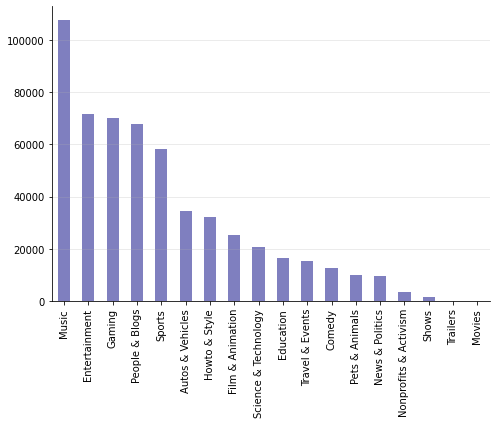

In [479]:
cat_counts = df['videoCategory'].value_counts()

fig, ax1 = plt.subplots()

cat_counts.plot(kind='bar', figsize=(7, 6), rot=90, color="navy", alpha=0.5,)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.grid(axis='y', alpha=0.30)

plt.tight_layout()
plt.savefig('/content/fig_1.pdf')
plt.show()
plt.clf()
plt.close('all')


Let's add a new column for channels with only one video, and a new column by thie sizes:

In [480]:
df['only_one_video'] = (df.groupby('channelId')['channelId'].transform('size')==1).astype(int)
df['num_videos'] = df.groupby('channelId')['channelId'].transform('size')

<ipython-input-480-99d7a49f984b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['only_one_video'] = (df.groupby('channelId')['channelId'].transform('size')==1).astype(int)
<ipython-input-480-99d7a49f984b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_videos'] = df.groupby('channelId')['channelId'].transform('size')


Creating a data at the channel level:

In [481]:
channel_vars = ['channelViewCount', 'channelelapsedtime','channelCommentCount', 'only_one_video','subscriberCount', "num_videos" ]
df_channel = df.groupby('channelId')[channel_vars].mean()
df_channel = df_channel.reset_index()
df_channel

,channelId,channelViewCount,channelelapsedtime,channelCommentCount,only_one_video,subscriberCount,num_videos
0,UC---m7XTCtS18T7RE0OrpvQ,274425.0,39456.0,0.0,1.0,556.0,1.0
1,UC--086bdvriNtYsQGhSRlxA,386768.0,56880.0,86.0,0.0,487.5,2.0
2,UC--0eL8it3N6KAxk25cMOWA,3703.0,72912.0,0.0,1.0,3.0,1.0
3,UC--0iYCuYerc9Kpm04Hf-NQ,54671.0,79848.0,1.0,1.0,82.0,1.0
4,UC--0zIGvONw7blaNh8wFoJg,168150.0,75888.0,44.0,1.0,340.0,1.0
...,...,...,...,...,...,...,...
449975,UCzzyhOAP4Khoo3aDTy92rRg,6416797.0,92905.0,68.0,1.0,4785.0,1.0
449976,UCzzyzwt2yr00U-dO2JVPRng,362340.0,83160.0,1.0,1.0,289.0,1.0
449977,UCzzz6aH6jU4cdVnZrjEP7Vg,68245.0,95881.0,5.0,1.0,43.0,1.0
449978,UCzzzIDrTsyKkclyQIzHs0mQ,26680.0,99601.0,1.0,0.0,25.0,2.0


In [482]:
descriptive_channel =df_channel.describe().T
descriptive_channel.to_csv(os.path.join(os.getcwd(), 'descriptive_channel.csv'))

In [483]:
len(df_channel)

449980

Creating a sorted df by=['channelId', 'videoPublished']:

In [484]:
sorted_df = df.sort_values(by=['channelId', 'videoPublished'],ascending=True)
sorted_df

,totalviews/channelelapsedtime,channelId,videoCategoryId,channelViewCount,likes/subscriber,views/subscribers,videoCount,subscriberCount,videoId,dislikes/views,...,videoLikeCount,videoDislikeCount,dislikes/subscriber,totviews/totsubs,views/elapsedtime,videoPublished,VideoCommentCount,videoCategory,only_one_video,num_videos
index,,,,,,,,,,,,,,,,,,,,,
170242,6.955216,UC---m7XTCtS18T7RE0OrpvQ,10,274425,0.053957,9.170863,4,556,6MVhg-VKQX0,0.000000,...,30.0,0.0,0.000000,493.570144,0.129311,2013-04-06 14:33:37+00:00,2.0,Music,1,1
129901,6.800650,UC--086bdvriNtYsQGhSRlxA,1,386821,0.071429,12.077869,50,488,5O63v7TlhJQ,0.000181,...,24.0,2.0,0.001497,792.665984,0.104193,2011-04-23 05:13:52+00:00,4.0,Film & Animation,0,2
1368,6.798787,UC--086bdvriNtYsQGhSRlxA,1,386715,0.071429,11.913758,50,487,-0Hy1ql6Eyw,0.000181,...,24.0,2.0,0.001497,794.075975,0.104158,2011-05-29 02:39:57+00:00,4.0,Film & Animation,0,2
89158,0.050787,UC--0eL8it3N6KAxk25cMOWA,17,3703,2.000000,412.000000,3,3,4z80IrqDV6k,0.001618,...,6.0,2.0,0.666667,1234.333333,0.024571,2012-01-09 16:15:03+00:00,1.0,Sports,1,1
355515,0.684688,UC--0iYCuYerc9Kpm04Hf-NQ,24,54671,0.012195,15.024390,33,82,23rKOh6zRd8,0.000000,...,1.0,0.0,0.000000,666.719512,0.023270,2011-09-21 05:33:20+00:00,1.0,Entertainment,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100799,4.357143,UCzzyzwt2yr00U-dO2JVPRng,2,362340,0.121107,72.730104,61,289,4YNk9Jhy3qQ,0.000190,...,35.0,4.0,0.013841,1253.771626,0.461672,2012-07-25 21:10:08+00:00,10.0,Autos & Vehicles,1,1
174312,0.711768,UCzzz6aH6jU4cdVnZrjEP7Vg,26,68245,0.279070,271.186047,20,43,6VLAXWnRghM,0.000086,...,12.0,1.0,0.023256,1587.093023,0.142820,2008-06-11 21:39:23+00:00,4.0,Howto & Style,1,1
329786,0.267869,UCzzzIDrTsyKkclyQIzHs0mQ,28,26680,0.000000,68.040000,45,25,1q_xLRS9VGQ,0.000000,...,0.0,0.0,0.000000,1067.200000,0.021688,2008-10-24 15:12:59+00:00,0.0,Science & Technology,0,2


## Visualisations:

Creating a new column 'gap' and a description on gap stats:

In [485]:
sorted_df['gap'] = ( sorted_df['videoPublished']-sorted_df.groupby('channelId')['videoPublished'].shift()).dt.days

In [486]:
gap_stats = sorted_df.groupby("channelId")['gap'].agg(['mean', 'min', 'max'])
gap_stats = gap_stats[gap_stats['max'].notna()]

In [487]:
descriptive_channel_gap =gap_stats.describe().T
descriptive_channel_gap.to_csv(os.path.join(os.getcwd(), 'descriptive_channel_gap.csv'))
descriptive_channel_gap

,count,mean,std,min,25%,50%,75%,max
mean,49801.0,318.504397,363.163559,0.0,74.5,198.0,425.0,3165.0
min,49801.0,258.638863,369.589934,0.0,20.0,106.0,346.0,3165.0
max,49801.0,400.550411,410.858834,0.0,94.0,281.0,572.0,3194.0


Creating outcomes list, we will use this list to evuluate the sucess of YouTube videos and channels:

In [488]:
outcomes = ['videoViewCount','videoLikeCount','videoDislikeCount','VideoCommentCount']

In [489]:
video_cat_means = sorted_df.groupby('videoCategory')[outcomes].mean()


Plotting the connections between outcomes and video catagories:

videoViewCount


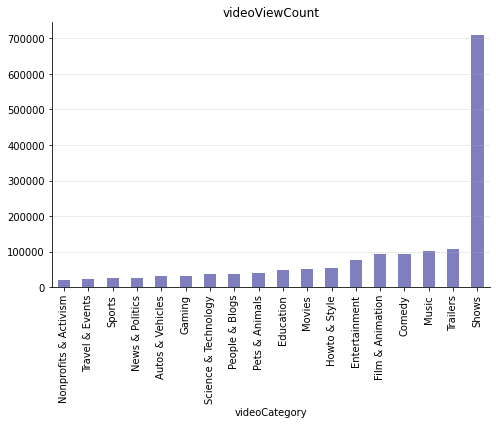

videoLikeCount


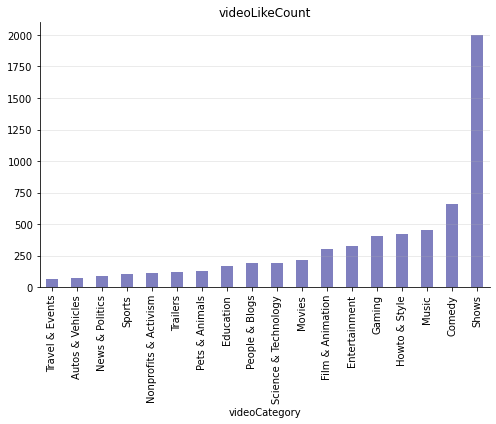

videoDislikeCount


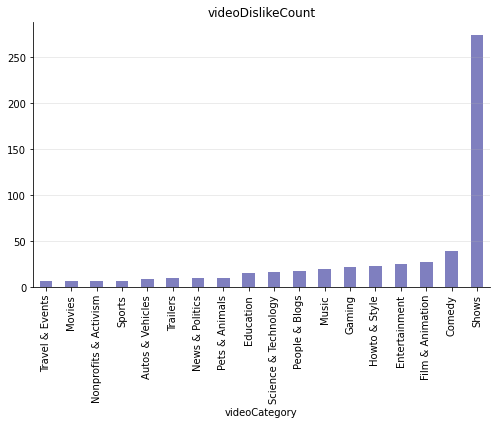

VideoCommentCount


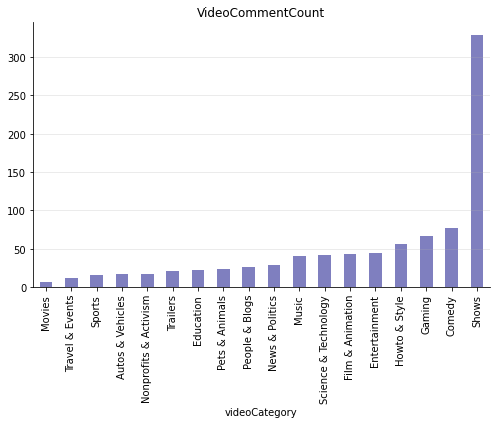

In [490]:
for outcome in outcomes:
  print(outcome)
  fig, ax1 = plt.subplots()

  video_cat_means[outcome].sort_values().plot(kind='bar', figsize=(7, 6), rot=90, color="navy", alpha=0.5,)
  ax1.spines['right'].set_visible(False)
  ax1.spines['top'].set_visible(False)
  plt.grid(axis='y', alpha=0.30)

  plt.title(outcome)

  plt.tight_layout()
  #descriptive.to_csv(os.path.join(os.getcwd(), 'feature_description.csv'))
  plt.savefig( os.path.join(os.getcwd(), f'categories_and_{outcome}.pdf'))
  plt.show()
  plt.clf()
  plt.close('all')


Plotting the conection between num_videos and channelViewCount:

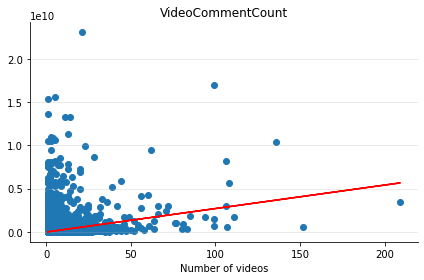

In [491]:
# Plot the scatter plot
x = df_channel['num_videos']
y = df_channel['channelViewCount']

# Fit a polynomial to the data
coefficients = np.polyfit(x, y, 1)

# Generate the regression line
regression_line = coefficients[0] * x + coefficients[1]

# Plot the regression line
fig, ax1 = plt.subplots()

plt.scatter(x, y)

ax1.plot(x, regression_line, color='red')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.grid(axis='y', alpha=0.30)
plt.xlabel("Number of videos")


plt.title(outcome)

plt.tight_layout()
# plt.savefig(f'/content/categories_and_{outcome}.pdf')
plt.show()
plt.clf()
plt.close('all')


# Show the plot
plt.show()

Within channales, which videos get more attention?
<br> A case study of channels with between 10 to 20 videos.

In [492]:
sorted_df['order'] = sorted_df.groupby('channelId').cumcount() + 1

14629


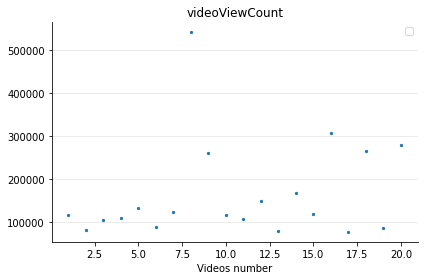

14629


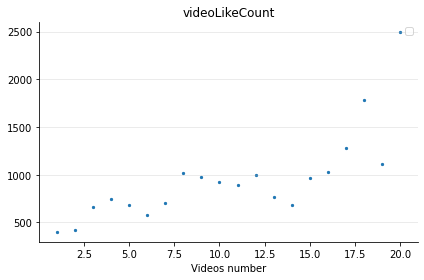

14629


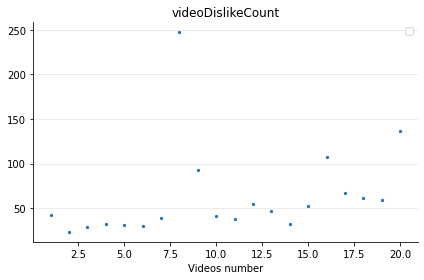

14629


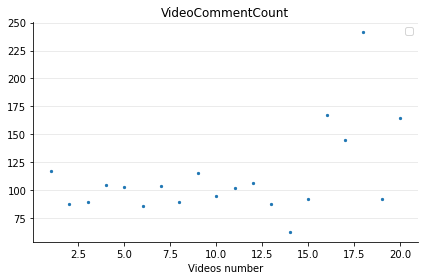

In [493]:
for outcome in outcomes:

  df_aux = sorted_df[ (sorted_df['num_videos']>=10) & (sorted_df['num_videos']<=20)]
  print(len(df_aux))

  grouped = df_aux.groupby(["order"])[outcome].mean().reset_index()
  grouped = grouped[grouped[outcome].notna()]
  grouped

  # Plot the regression line
  fig, ax1 = plt.subplots()


  # for lab in labels:
  ax1.scatter(grouped['order'], grouped[outcome], s=5)

  ax1.spines['right'].set_visible(False)
  ax1.spines['top'].set_visible(False)
  plt.grid(axis='y', alpha=0.30)
  plt.legend(loc='best')
  plt.xlabel("Videos number")


  plt.title(f"{outcome}")

  plt.tight_layout()
  plt.savefig(f'/content/videoOrders_and_{outcome}.pdf')
  plt.show()
  plt.clf()
  plt.close('all')


  # Show the plot
  plt.show()


## Conclusions:

*   Entertainment video categories are highly popular.
*   Contrary to popular belief, a high dislike count does not necessarily.
*   Contrary to popular belief, a high dislike count does not necessarily correspond to a low view count.
*   Channels with more videos tend to be popular.
*   The latest videos on a channel tend to have higher viewer engagement.


